# 서울시의 매출 데이터를 분석하여 패턴 파악하기

- 비율을 중심으로 설명 할 예정
- 연령별로 어떤 상품대가 가장 많은 매출의 비율을 기록하는지
- 비율이 비슷하다면, 서비스업종의 매출을 비교하여 어느쪽의 비중이 더 높은지 확인
- MZ세대 (10대~30대)를 중심으로 볼 것이며, 이들이 Main target이 될 것임

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
s2021=pd.read_csv('서울시데이터/서울시2021.csv',encoding='utf-8')
s2020=pd.read_csv('서울시데이터/서울시2020.csv',encoding='utf-8')
s2019=pd.read_csv('서울시데이터/서울시2019.csv',encoding='utf-8')
s2018=pd.read_csv('서울시데이터/서울시2018.csv',encoding='utf-8')
s2017=pd.read_csv('서울시데이터/서울시2017.csv',encoding='utf-8')
s2016=pd.read_csv('서울시데이터/서울시2016.csv',encoding='utf-8')

In [125]:
s2021.columns[:33]

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

In [126]:
slice2021=s2021.iloc[:,:33]
slice2020=s2020.iloc[:,:33]
slice2019=s2019.iloc[:,:33]
slice2018=s2018.iloc[:,:33]
slice2017=s2017.iloc[:,:33]
slice2016=s2016.iloc[:,:33]

In [127]:
slice2021.T

,0,1,2,3,4,5,6,7,8,9,...,64728,64729,64730,64731,64732,64733,64734,64735,64736,64737
기준_년_코드,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,...,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
기준_분기_코드,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
상권_구분_코드,U,U,U,U,U,U,U,U,U,U,...,A,A,A,A,A,A,A,A,A,A
상권_구분_코드_명,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,관광특구,...,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권,골목상권
상권_코드,1001496,1001496,1001496,1001496,1001496,1001496,1001496,1001496,1001496,1001496,...,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001,1000001
상권_코드_명,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,강남 마이스 관광특구,...,계동길,계동길,계동길,계동길,계동길,계동길,계동길,계동길,계동길,계동길
서비스_업종_코드,CS300043,CS300035,CS300032,CS300031,CS300028,CS300027,CS300026,CS300024,CS300022,CS300021,...,CS200008,CS200001,CS100010,CS100008,CS100006,CS100005,CS100004,CS100003,CS100002,CS100001
서비스_업종_코드_명,전자상거래업,인테리어,가전제품,가구,화초,섬유제품,완구,운동/경기용품,화장품,문구,...,한의원,일반교습학원,커피-음료,분식전문점,패스트푸드점,제과점,양식음식점,일식음식점,중식음식점,한식음식점
분기당_매출_금액,5.83608e+06,8.61204e+07,1.82985e+09,1.10196e+10,1.02684e+09,1.49401e+09,4.44615e+08,8.76507e+09,2.40114e+10,8.0945e+08,...,4.06411e+07,1.29e+08,7.64429e+08,2.97025e+08,4.21061e+07,1.65688e+08,1.99448e+08,6.03255e+07,3.97919e+07,3.16763e+08
분기당_매출_건수,92,739,8110,5852,22212,50941,6016,37240,163982,54655,...,592,494,54638,15459,3498,18512,4442,1563,2042,13820


In [128]:
slice2021['서비스_업종_코드_명'].unique()

array(['전자상거래업', '인테리어', '가전제품', '가구', '화초', '섬유제품', '완구', '운동/경기용품',
       '화장품', '문구', '의약품', '시계및귀금속', '안경', '가방', '신발', '일반의류', '반찬가게',
       '핸드폰', '컴퓨터및주변장치판매', '편의점', '슈퍼마켓', '피부관리실', '네일숍', '미용실', '스포츠클럽',
       '치과의원', '일반의원', '커피-음료', '분식전문점', '패스트푸드점', '제과점', '양식음식점',
       '일식음식점', '중식음식점', '한식음식점', '의료기기', '육류판매', '노래방', '고시원', '여관',
       '세탁소', '자동차수리', 'PC방', '골프연습장', '당구장', '한의원', '스포츠 강습', '호프-간이주점',
       '치킨전문점', '조명용품', '철물점', '애완동물', '서적', '청과상', '수산물판매', '미곡판매',
       '가전제품수리', '예술학원', '외국어학원', '일반교습학원', '자동차미용', '자전거 및 기타운송장비',
       '부동산중개업'], dtype=object)

In [129]:
q1_2021['상권_구분_코드_명'].unique()

array(['관광특구', '전통시장', '발달상권', '골목상권'], dtype=object)

In [130]:
q1_2021.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

In [131]:
# 1분기 데이터만 추출하고, 요일, 시간별, 연령별 매출 비율 비교
q1_2021=slice2021.loc[slice2021['기준_분기_코드']==1] # 분기가 1인 데이터만 가져옴
q1_2021.drop(['기준_년_코드','상권_구분_코드','상권_코드','서비스_업종_코드'],axis=1) # 필요없는 데이터 제거

,기준_분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
32378,1,관광특구,강남 마이스 관광특구,전자상거래업,5.246740e+05,5,0,100,0,0,...,0,0,0,100,0,0,100,0,0,0
32379,1,관광특구,강남 마이스 관광특구,가전제품,2.403139e+09,8727,65,35,11,9,...,37,1,41,42,1,16,21,15,18,13
32380,1,관광특구,강남 마이스 관광특구,가구,1.176752e+10,6378,52,48,11,7,...,24,0,43,57,0,2,12,35,22,29
32381,1,관광특구,강남 마이스 관광특구,화초,4.073456e+08,11502,68,32,11,15,...,34,2,53,27,0,11,33,22,10,4
32382,1,관광특구,강남 마이스 관광특구,섬유제품,8.173143e+08,27705,54,46,10,10,...,47,3,20,80,3,45,19,18,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64733,1,골목상권,계동길,제과점,1.656883e+08,18512,76,24,14,16,...,27,4,37,45,1,11,19,18,16,17
64734,1,골목상권,계동길,양식음식점,1.994485e+08,4442,54,46,8,10,...,48,2,40,43,0,28,25,9,15,6
64735,1,골목상권,계동길,일식음식점,6.032547e+07,1563,84,16,14,16,...,30,25,30,36,0,8,19,16,16,7
64736,1,골목상권,계동길,중식음식점,3.979185e+07,2042,68,32,14,12,...,35,1,39,49,10,33,15,13,12,5


- 업종별로 평균을 매겨서 요일, 연령대, 시간별 비율 환산

In [132]:
q1_2021['서비스_업종_코드_명'].unique()[0]

'전자상거래업'

In [144]:
a=q1_2021['서비스_업종_코드_명']=='전자상거래업'
b=q1_2021[a]

In [145]:
b

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
32378,2021,1,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,5.246740e+05,5,...,0,0,0,100,0,0,100,0,0,0
32456,2021,1,U,관광특구,1001494,종로?청계 관광특구,CS300043,전자상거래업,2.630759e+09,73395,...,36,0,55,43,0,21,26,21,17,13
32512,2021,1,U,관광특구,1001493,동대문패션타운 관광특구,CS300043,전자상거래업,3.698570e+10,2247920,...,45,3,40,60,0,24,27,25,17,7
32559,2021,1,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,CS300043,전자상거래업,2.355077e+08,3127,...,29,0,48,31,0,4,33,22,15,6
32616,2021,1,U,관광특구,1001491,이태원 관광특구,CS300043,전자상거래업,1.287868e+08,184,...,0,0,0,100,0,0,0,100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64236,2021,1,A,골목상권,1000032,다산로38길,CS300043,전자상거래업,4.344495e+06,1159,...,0,0,100,0,33,67,0,0,0,0
64310,2021,1,A,골목상권,1000028,난계로11길,CS300043,전자상거래업,6.465251e+07,380,...,0,0,100,0,0,100,0,0,0,0
64467,2021,1,A,골목상권,1000017,종로24길,CS300043,전자상거래업,1.295399e+09,19735,...,44,0,94,6,0,6,17,31,22,24
64545,2021,1,A,골목상권,1000013,율곡로10길,CS300043,전자상거래업,1.208319e+07,201,...,0,0,100,0,0,0,0,0,0,100


In [135]:
q1_2021.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율'],
      dtype='object')

- 시간대별 평균 구하기 [19:25]

In [152]:
b=b.iloc[:,10:]
b_mean=b.mean()
b_mean

주중_매출_비율           79.947674
주말_매출_비율           20.110465
월요일_매출_비율          16.168605
화요일_매출_비율          17.587209
수요일_매출_비율          16.691860
목요일_매출_비율          12.680233
금요일_매출_비율          16.953488
토요일_매출_비율          12.784884
일요일_매출_비율           7.343023
시간대_00~06_매출_비율     0.127907
시간대_06~11_매출_비율     7.883721
시간대_11~14_매출_비율    23.273256
시간대_14~17_매출_비율    40.947674
시간대_17~21_매출_비율    25.755814
시간대_21~24_매출_비율     2.133721
남성_매출_비율           43.540698
여성_매출_비율           47.110465
연령대_10_매출_비율        0.598837
연령대_20_매출_비율       16.302326
연령대_30_매출_비율       21.470930
연령대_40_매출_비율       21.436047
연령대_50_매출_비율       17.750000
연령대_60_이상_매출_비율    13.250000
dtype: float64

In [153]:
b2=b_mean.to_frame()
b2.columns=['비율']
b2=b2.reset_index()
b2

,index,비율
0,주중_매출_비율,79.947674
1,주말_매출_비율,20.110465
2,월요일_매출_비율,16.168605
3,화요일_매출_비율,17.587209
4,수요일_매출_비율,16.691860
5,목요일_매출_비율,12.680233
6,금요일_매출_비율,16.953488
7,토요일_매출_비율,12.784884
8,일요일_매출_비율,7.343023
9,시간대_00~06_매출_비율,0.127907


In [154]:
b_meanweek=b2[:2]
b_meanday=b2[2:9]
b_meantime=b2[9:15]
b_meangen=b2[15:17]
b_meanage=b2[17:]
b_meantime

,index,비율
9,시간대_00~06_매출_비율,0.127907
10,시간대_06~11_매출_비율,7.883721
11,시간대_11~14_매출_비율,23.273256
12,시간대_14~17_매출_비율,40.947674
13,시간대_17~21_매출_비율,25.755814
14,시간대_21~24_매출_비율,2.133721


In [98]:
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

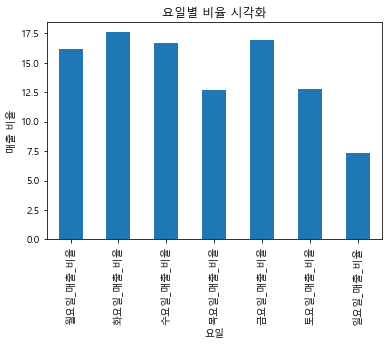

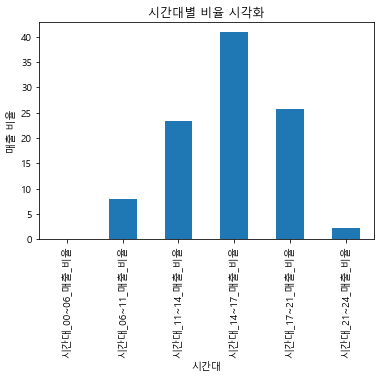

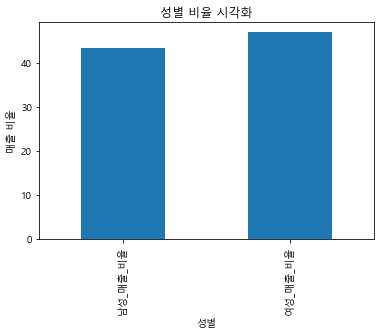

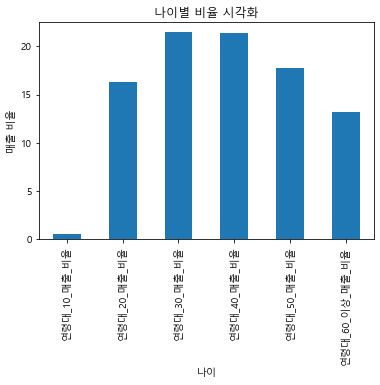

In [165]:
# 요일, 시간대, 성별, 나이별로 시각화

# 요일
b_mean[2:9].plot(kind='bar')
plt.title('요일별 비율 시각화')
plt.xlabel('요일')
plt.ylabel('매출 비율')
plt.xticks()
plt.show()

# 시간대
b_mean[9:15].plot(kind='bar')
plt.title('시간대별 비율 시각화')
plt.xlabel('시간대')
plt.ylabel('매출 비율')
plt.show()

# 성별
b_mean[15:17].plot(kind='bar')
plt.title('성별 비율 시각화')
plt.xlabel('성별')
plt.ylabel('매출 비율')
plt.show()

# 나이대
b_mean[17:].plot(kind='bar')
plt.title('나이별 비율 시각화')
plt.xlabel('나이')
plt.ylabel('매출 비율')
plt.show()